In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../artifacts/Amazon Smart Phones Product Reviews and Rating dataset.csv') 

# Display the first few rows
df.head()

,Unnamed: 0,product_id,product_url,product_name,product_img,product_price,product_overall_rating,total_reviews,user_name,review_url,review_rating,review_title,review_description
0,0,B0CMDMKQB7,https://www.amazon.com/SAMSUNG-Smartphone-Unlo...,"Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...",https://m.media-amazon.com/images/I/71WcjsOVOm...,"$1,169.99",4.5,"3,656",Carl,https://www.amazon.com/gp/customer-reviews/R3E...,5.0,Great phone with tons of features!,I've had the Samsung Galaxy s24 128gb marble g...
1,1,B0CMDMKQB7,https://www.amazon.com/SAMSUNG-Smartphone-Unlo...,"Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...",https://m.media-amazon.com/images/I/71WcjsOVOm...,"$1,169.99",4.5,"3,656",Adrian,https://www.amazon.com/gp/customer-reviews/R8W...,5.0,The perfect phone that doesn't come cheap,"PLEEEEEASE people, stop complaining about the ..."
2,2,B0CMDMKQB7,https://www.amazon.com/SAMSUNG-Smartphone-Unlo...,"Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...",https://m.media-amazon.com/images/I/71WcjsOVOm...,"$1,169.99",4.5,"3,656",Sharke,https://www.amazon.com/gp/customer-reviews/RRL...,5.0,"A Powerhouse with Stunning Display, Sleek Desi...",I've been using the Samsung Galaxy S24 Ultra f...
3,3,B0CMDMKQB7,https://www.amazon.com/SAMSUNG-Smartphone-Unlo...,"Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...",https://m.media-amazon.com/images/I/71WcjsOVOm...,"$1,169.99",4.5,"3,656",Cynthia,https://www.amazon.com/gp/customer-reviews/R3R...,5.0,Fast and Efficient,"This phone is blazing fast, I can't believe ho..."
4,4,B0CMDMKQB7,https://www.amazon.com/SAMSUNG-Smartphone-Unlo...,"Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...",https://m.media-amazon.com/images/I/71WcjsOVOm...,"$1,169.99",4.5,"3,656",Karl,https://www.amazon.com/gp/customer-reviews/RTH...,5.0,"Excellent camera, fast and responsive","Love my new phone, it's sharp clean and full ..."


In [2]:
# Count reviews per product
product_counts = df['product_name'].value_counts()
print(product_counts)

product_name
Samsung Galaxy A15 A155M 128GB Dual-SIM GSM Unlocked Android Smartphone (Latin America Version) - Blue Black                                                                                               1755
Samsung Galaxy A05 A055M 64GB Dual-SIM GSM Unlocked Android Smartphone (Latin America Version) - Light Green                                                                                               1755
Samsung Galaxy A15 (SM-155M/DSN), 128GB 6GB RAM, Dual SIM, Factory Unlocked GSM, International Version (Wall Charger Bundle) (Light Blue)                                                                  1755
SAMSUNG,Galaxy A04e (SM-A042M/DS) Dual SIM 32GB,6.5'' GSM Unlocked,International Version-Black                                                                                                             1755
SAMSUNG Galaxy A05 (128GB, 4GB) 6.7" Dual SIM Fully Unlocked Global 4G LTE A055M/DS (Black)                                                                

In [3]:
# Find null values
print("Null values per column:")
print(df.isnull().sum())

# Total null values
print(f"\nTotal null values: {df.isnull().sum().sum()}")

# Percentage of null values
print("\nPercentage of null values per column:")
print((df.isnull().sum() / len(df)) * 100)

Null values per column:
Unnamed: 0                    0
product_id                    0
product_url                   0
product_name                  0
product_img                   0
product_price             12015
product_overall_rating        0
total_reviews                 0
user_name                     0
review_url                 8505
review_rating                 0
review_title                  0
review_description            0
dtype: int64

Total null values: 20520

Percentage of null values per column:
Unnamed: 0                 0.000000
product_id                 0.000000
product_url                0.000000
product_name               0.000000
product_img                0.000000
product_price             43.842365
product_overall_rating     0.000000
total_reviews              0.000000
user_name                  0.000000
review_url                31.034483
review_rating              0.000000
review_title               0.000000
review_description         0.000000
dtype: float64

In [4]:
# Combine review title and description into a single text field
df["review_text"] = df["review_title"] + ". " + df["review_description"]

In [5]:
df.groupby(['product_id', 'user_name']).size().sort_values(ascending=False).head(10)


product_id  user_name        
B0BLZN9NDG  Tuly                 270
B07R4C6KQY  Angelo               135
            Dad, the engineer    135
            Jenn T.              135
            Moisés               135
            Tracy Jones          135
            boi                  135
B09BFRV59N  Cliente de Amazon    135
            Earthling1984        135
B07R4C6KQY  Chris Fortner        135
dtype: int64

In [6]:
#remove full row duplicates
df= df.drop_duplicates(keep='first')
print("After full-row dedup:", df.shape)

df['text_len'] = df['review_text'].str.len()

df = df[
    (df['text_len'] > 15) &
    (df['text_len'] < 2000)
]

df = df.drop_duplicates(
    subset=[ 'review_text'],
    keep='first'
)

print("After logical dedup:", df.shape)


After full-row dedup: (27405, 14)
After logical dedup: (177, 15)


In [7]:
# Drop the original title, description & total reviews columns
df = df.drop(columns=['review_title', 'review_description','total_reviews'])

In [8]:
# Display the shape of the cleaned dataframe
df.shape

(177, 12)

In [9]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply text cleaning
df["clean_text"] = df["review_text"].apply(clean_text)


In [10]:
# Drop the 'Unnamed: 0' column if it exists
df = df.drop(columns=['Unnamed: 0'])

In [11]:
# Drop the original 'review_text' column
df = df.drop(columns=['review_text'])

In [12]:
# Display the shape of the cleaned dataframe
df.shape

(177, 11)

In [13]:
# Install required libraries (run in terminal first)
# pip install transformers torch sentencepiece

from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load pre-trained BERT sentiment model
sentiment_pipeline = pipeline("sentiment-analysis", 
                             model="nlptown/bert-base-multilingual-uncased-sentiment")

# Define the smartphone features you want to track
aspect_map = {
    "battery": ["battery", "charging", "power", "mah", "runtime"],
    "camera": ["camera", "photos", "lens", "zoom", "video", "selfie"],
    "display": ["screen", "display", "resolution", "refresh rate", "oled", "amoled"],
    "performance": ["speed", "gaming", "ram", "processor", "chipset", "lag"],
    "storage": ["storage", "memory", "gb", "space"],
    "design": ["design", "build", "looks", "premium", "lightweight"],
    "price": ["price", "value", "worth", "expensive", "cheap"],
    "sound": ["sound", "speaker", "audio", "volume", "music"]
}

# Function to extract sentences mentioning aspects
def extract_aspect_sentences(text, aspect_keywords):
    sentences = text.split('.')
    aspect_sentences = []
    for sent in sentences:
        sent = sent.strip()
        if len(sent) > 0 and any(keyword in sent.lower() for keyword in aspect_keywords):
            aspect_sentences.append(sent)
    return aspect_sentences

# Function to analyze sentiment with BERT for each aspect
def bert_aspect_sentiment(text):
    aspect_sentiments = {}
    
    for aspect, keywords in aspect_map.items():
        aspect_sents = extract_aspect_sentences(text, keywords)
        
        if aspect_sents:
            sentiments = []
            for sent in aspect_sents[:3]:  # Limit to 3 sentences per aspect
                try:
                    if len(sent) > 10:  # Minimum length check
                        result = sentiment_pipeline(sent[:512])[0]  # BERT max length
                        # Convert star rating to score (-1 to 1)
                        label = result['label']
                        score = int(label.split()[0]) - 3  # Convert 1-5 stars to -2 to 2
                        score = score / 2  # Normalize to -1 to 1
                        sentiments.append(score)
                except:
                    continue
            
            if sentiments:
                aspect_sentiments[aspect] = {
                    'score': np.mean(sentiments),
                    'count': len(sentiments),
                    'sentiment': 'positive' if np.mean(sentiments) > 0.1 else ('negative' if np.mean(sentiments) < -0.1 else 'neutral')
                }
    
    return aspect_sentiments

# Apply to dataset (test on first 100 rows)
print("Processing sentiment analysis...")
df['aspect_sentiments'] = df['clean_text'].head(100).apply(bert_aspect_sentiment)

# Display sample results
print("\nSample results:")
print(df[['product_name', 'aspect_sentiments']].head())

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Processing sentiment analysis...

Sample results:
                                        product_name  \
0  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   
2  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   
3  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   
4  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   
5  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   

                                   aspect_sentiments  
0  {'battery': {'score': 0.5, 'count': 1, 'sentim...  
2  {'battery': {'score': 1.0, 'count': 2, 'sentim...  
3  {'design': {'score': 1.0, 'count': 1, 'sentime...  
4  {'camera': {'score': 1.0, 'count': 1, 'sentime...  
5  {'display': {'score': 0.5, 'count': 1, 'sentim...  


In [14]:
# Extract aspect scores into separate columns
def extract_aspect_scores(row):
    scores = {}
    # Check if row is a dictionary (not NaN or other types)
    if not isinstance(row, dict):
        for aspect in aspect_map.keys():
            scores[f'{aspect}_score'] = None
    else:
        for aspect in aspect_map.keys():
            if aspect in row:
                scores[f'{aspect}_score'] = row[aspect]['score']
            else:
                scores[f'{aspect}_score'] = None
    return pd.Series(scores)

# Apply extraction
aspect_scores_df = df['aspect_sentiments'].apply(extract_aspect_scores)
df = pd.concat([df, aspect_scores_df], axis=1)

# Aggregate by product
product_aspect_sentiments = df.groupby('product_name')[
    [col for col in df.columns if '_score' in col]
].mean()

print(product_aspect_sentiments)

                                                    battery_score  \
product_name                                                        
Google - Pixel 3a XL with 64GB Memory Cell Phon...            NaN   
Google Pixel 7a - Unlocked Android Cell Phone -...            NaN   
Moto G Play | 2024 | Unlocked | Made for US 4/6...       0.388889   
Moto G Power 5G | 2024 | Unlocked | Made for US...       0.750000   
Moto G Stylus 5G | 2024 | Unlocked | Made for U...       0.291667   
Moto G Stylus 5G | 2024 | Unlocked | Made for U...            NaN   
Motorola Moto G Power 5G | 2023 | Unlocked | Ma...       0.444444   
Motorola Moto G Stylus 5G | 2023 | Unlocked | M...       0.666667   
Motorola razr | 2023 | Unlocked | Made for US 8...            NaN   
OnePlus Nord N30 5G | Unlocked Dual-SIM Android...       0.416667   
SAMSUNG Galaxy A05 (128GB, 4GB) 6.7" Dual SIM F...            NaN   
SAMSUNG Galaxy A15 5G A Series Cell Phone, 128G...       0.833333   
SAMSUNG Galaxy A25 5G A Series Cel

In [15]:
# Save processed data
df.to_csv('../artifacts/preprocessed_with_sentiments.csv', index=False)
print("Data saved successfully!")

Data saved successfully!


In [16]:
# Load and validate the saved file
df_check = pd.read_csv('../artifacts/preprocessed_with_sentiments.csv')
print(f"Shape: {df_check.shape}")
print(f"Columns: {df_check.columns.tolist()}")
print(df_check.head())
df_check.shape

Shape: (177, 20)
Columns: ['product_id', 'product_url', 'product_name', 'product_img', 'product_price', 'product_overall_rating', 'user_name', 'review_url', 'review_rating', 'text_len', 'clean_text', 'aspect_sentiments', 'battery_score', 'camera_score', 'display_score', 'performance_score', 'storage_score', 'design_score', 'price_score', 'sound_score']
   product_id                                        product_url  \
0  B0CMDMKQB7  https://www.amazon.com/SAMSUNG-Smartphone-Unlo...   
1  B0CMDMKQB7  https://www.amazon.com/SAMSUNG-Smartphone-Unlo...   
2  B0CMDMKQB7  https://www.amazon.com/SAMSUNG-Smartphone-Unlo...   
3  B0CMDMKQB7  https://www.amazon.com/SAMSUNG-Smartphone-Unlo...   
4  B0CMDMKQB7  https://www.amazon.com/SAMSUNG-Smartphone-Unlo...   

                                        product_name  \
0  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   
1  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   
2  Samsung Galaxy S24 Ultra Cell Phone, 512GB AI ...   
3  Samsung G

(177, 20)

In [17]:
# Remove .head(100) to process all rows
df['aspect_sentiments'] = df['clean_text'].apply(bert_aspect_sentiment)

In [18]:
from tqdm import tqdm
tqdm.pandas()
df['aspect_sentiments'] = df['clean_text'].progress_apply(bert_aspect_sentiment)

100%|██████████| 177/177 [01:40<00:00,  1.77it/s]


C:\Users\dell\AppData\Local\Temp\ipykernel_5756\2719636059.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


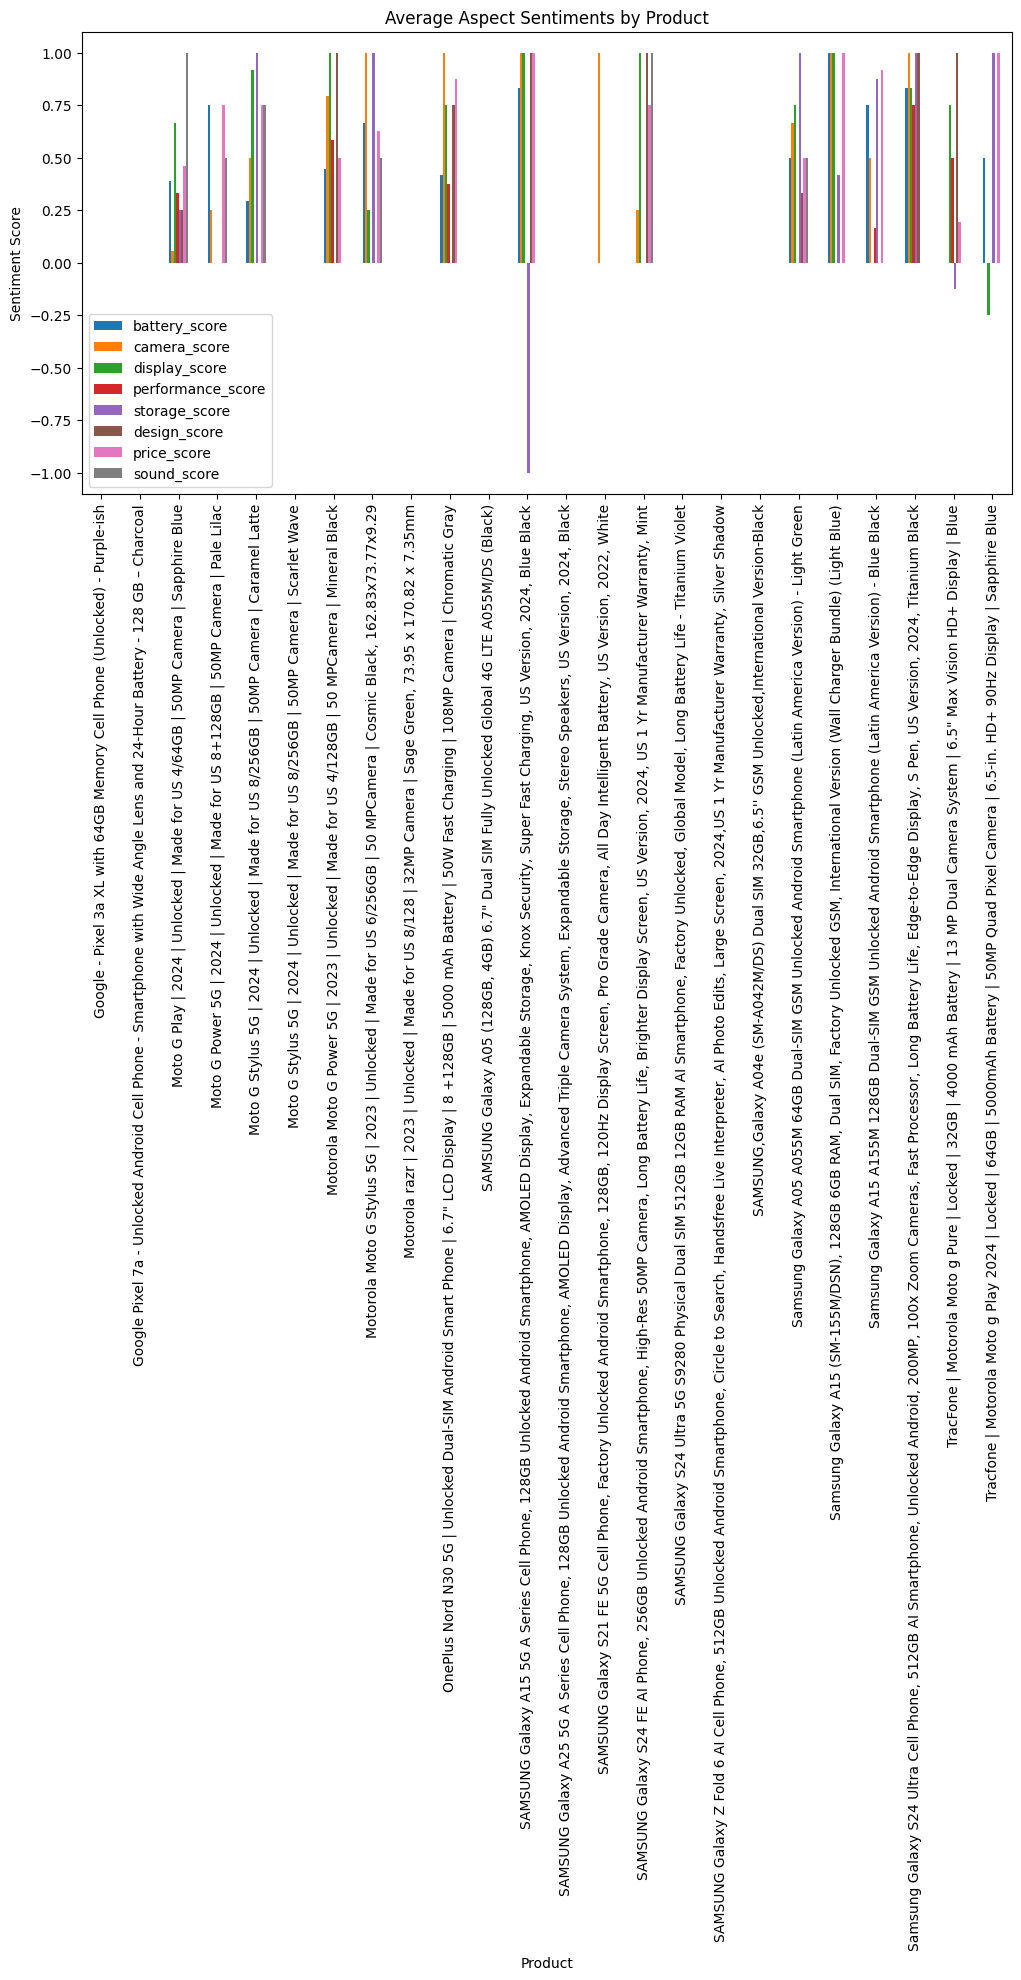

In [19]:
# Plot average sentiment scores by aspect
product_aspect_sentiments.plot(kind='bar', figsize=(12, 6))
plt.title('Average Aspect Sentiments by Product')
plt.xlabel('Product')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.show()

In [20]:
# Import MinMaxScaler for feature normalization
from sklearn.preprocessing import MinMaxScaler

# Define the list of aspect score columns that need to be normalized
# These columns represent different feature scores for smartphones
aspect_cols = ['battery_score','camera_score','display_score','performance_score',
               'storage_score','design_score','price_score','sound_score']

# Initialize the MinMaxScaler to scale features to a range between 0 and 1
scaler = MinMaxScaler()

# Apply Min-Max normalization to all aspect score columns
# This ensures all features are on the same scale for better model performance
df[aspect_cols] = scaler.fit_transform(df[aspect_cols])


In [21]:
# Define a function to identify the strengths of each product based on aspect scores
def get_strengths(row):
    # Initialize an empty list to store the product's strengths
    strengths = []
    # Iterate through each aspect score column
    for col in aspect_cols:
        # If the score is greater than 0.7 (indicating a strength), add it to the list
        if row[col] > 0.7:
            # Remove the '_score' suffix to get the clean feature name
            strengths.append(col.replace('_score',''))
    return strengths

# Apply the function to each row to create a new 'strengths' column
# This column will contain a list of features where the product excels
df['strengths'] = df.apply(get_strengths, axis=1)


In [22]:
# Define user profession profiles with weighted preferences for different smartphone features
# Each profession has specific feature priorities represented as weights that sum to 1
profession_profiles = {
    # Photographer prioritizes camera quality, then display, then storage
    "Photographer": {"camera":0.5, "display":0.3, "storage":0.2},
    # Gamer prioritizes performance, then battery life, then display quality
    "Gamer": {"performance":0.5, "battery":0.3, "display":0.2},
    # Student prioritizes price/affordability, then battery, then performance
    "Student": {"price":0.4, "battery":0.3, "performance":0.3},
    # Business professional prioritizes battery life, then storage, then design
    "Business": {"battery":0.4, "storage":0.3, "design":0.3},
    # Traveler prioritizes battery life, then camera, then design/portability
    "Traveler": {"battery":0.5, "camera":0.3, "design":0.2}
}


In [23]:
# Define a function to calculate how well a phone matches a user's profile
def match_score(phone_row, profile):
    # Initialize the matching score to 0
    score = 0
    # Iterate through each feature and its weight in the user's profile
    for feature, weight in profile.items():
        # Multiply the phone's feature score by the weight and add to total score
        # This creates a weighted sum based on user preferences
        score += phone_row[f"{feature}_score"] * weight
    # Return the final weighted match score
    return score


In [24]:
# Define a function to recommend the top 5 phones for a specific profession
def recommend_for(profession):
    # Retrieve the feature preference profile for the given profession
    profile = profession_profiles[profession]
    # Calculate match scores for all phones against the profession's profile
    # and store the scores in a new column named after the profession
    df[f'{profession}_score'] = df.apply(lambda x: match_score(x, profile), axis=1)
    # Sort phones by their match score in descending order and return the top 5 recommendations
    return df.sort_values(f'{profession}_score', ascending=False).head(5)

In [25]:
# Define a function to generate a user-friendly recommendation message for a phone
def generate_message(phone):
    # Extract the strengths (high-scoring features) for the phone
    strengths = phone['strengths']
    
    # Return a formatted message with product details and recommendation reasoning
    return f"""
📱 Recommended: {phone['product_name']}

✅ Strong in: {', '.join(strengths)}

This phone is ideal for users who value {', '.join(strengths)} performance.
Overall sentiment score: {round(sum(phone[aspect_cols])/len(aspect_cols),2)}
"""